In [2]:
import cv2 as cv
import json
from matplotlib import pyplot as plt
import os


src = os.path.join("datasets", "TeethSegmentation")
imgs = [os.path.join(src, im) for im in os.listdir(src) if im.endswith(".png")]
mdat = [os.path.join(src, dat) for dat in os.listdir(src) if dat.endswith(".json")]

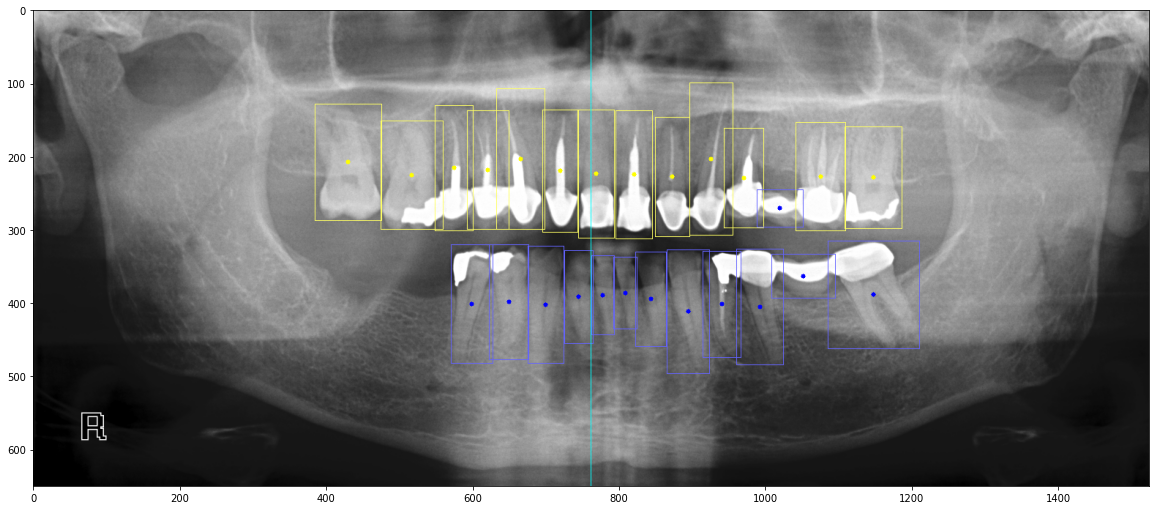

In [53]:
img_idx = 6

im_bgr = cv.imread(imgs[img_idx])  # No argument loads the image by default in BGR
im_gs = cv.imread(imgs[img_idx], cv.IMREAD_REDUCED_GRAYSCALE_2)  # Converts the image to GS, returning only 1 color channel
# im_col = cv.imread(imgs[img_idx], cv.IMREAD_COLOR)  # Loads as RGB, removing the Alpha channel if present
# im_gs8 = cv.imread(imgs[img_idx], cv.IMREAD_REDUCED_GRAYSCALE_8)  # Returns GS with size reduced by 1/8

im = cv.cvtColor(im_gs, cv.COLOR_GRAY2BGR)
with open(mdat[img_idx], "r") as f:
    a = json.load(f)
xs = []
ys = []
hs = []
ws = []
for idx, bbox in enumerate(a["annotations"]):
    x = int(bbox["bounding_box"]["x"] / 2)
    y = int(bbox["bounding_box"]["y"] / 2)
    h = int(bbox["bounding_box"]["h"] / 2)
    w = int(bbox["bounding_box"]["w"] / 2)
    xs.append(x)
    ys.append(y)
    hs.append(h)
    ws.append(w)

y_th = (min(ys) + max(ys)) >> 1
for x, y, h, w in zip(xs, ys, hs, ws):
    if y <= y_th:
        cv.rectangle(im, (x, y), (x + w, y + h), color=(255, 255, 100), thickness=1)
        cv.circle(im, (x + int(w / 2), y + int(h / 2)), radius=3, color=(255, 255, 0), thickness=-1)
    else:
        cv.rectangle(im, (x, y), (x + w, y + h), color=(100, 100, 255), thickness=1)
        cv.circle(im, (x + int(w / 2), y + int(h / 2)), radius=3, color=(0, 0, 255), thickness=-1)
cv.line(im, (int(im.shape[1] / 2), 0), (int(im.shape[1] / 2), im.shape[0]), (0, 255, 255), 1)
# cv.imshow("Display window", im)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.figure(figsize=(20, 10))
plt.imshow(im)
plt.show()

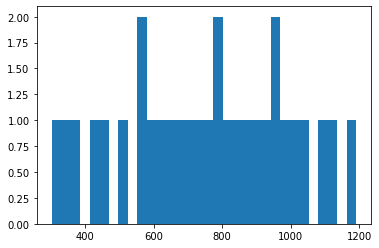

In [32]:
plt.figure()
plt.hist(xs, bins=32)
plt.show()

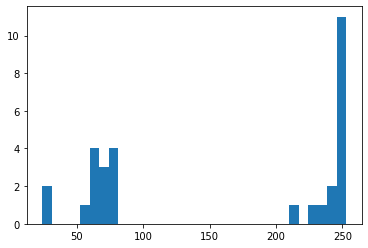

In [31]:
plt.figure()
plt.hist(ys, bins=32)
plt.show()

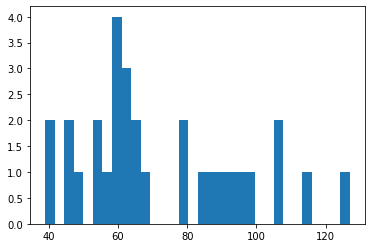

In [30]:
plt.figure()
plt.hist(ws, bins=32)
plt.show()

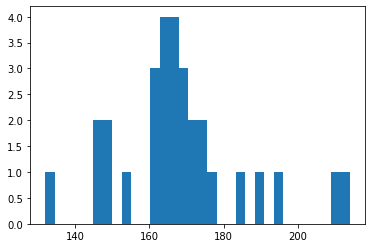

In [33]:
plt.figure()
plt.hist(hs, bins=32)
plt.show()